In [29]:
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [30]:
trainDF = pd.read_csv('train.csv')
print(trainDF.info())
trainDF.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


PassengerId  Survived  Pclass                                 Name   Sex   
220          221         1       3       Sunderland, Mr. Victor Francis  male  \
0              1         0       3              Braund, Mr. Owen Harris  male   
802          803         1       1  Carter, Master. William Thornton II  male   

      Age  SibSp  Parch           Ticket    Fare    Cabin Embarked  
220  16.0      0      0  SOTON/OQ 392089    8.05      NaN        S  
0    22.0      1      0        A/5 21171    7.25      NaN        S  
802  11.0      1      2           113760  120.00  B96 B98        S

In [31]:
testDF = pd.read_csv('test.csv')
print(testDF.info())
testDF.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None


PassengerId  Pclass                          Name     Sex   Age  SibSp   
404         1296       1  Frauenthal, Mr. Isaac Gerald    male  43.0      1  \
206         1098       3      McGowan, Miss. Katherine  female  35.0      0   
5            897       3    Svensson, Mr. Johan Cervin    male  14.0      0   

     Parch Ticket     Fare Cabin Embarked  
404      0  17765  27.7208   D40        C  
206      0   9232   7.7500   NaN        Q  
5        0   7538   9.2250   NaN        S

In [32]:
concatDF = pd.concat([trainDF,testDF])
concatDF = concatDF.reset_index(drop=True)
pd.get_dummies(concatDF,columns=['Sex','Embarked']).drop(columns=['PassengerId','Name','Ticket','Cabin']).corr()

Survived    Pclass       Age     SibSp     Parch      Fare   
Survived    1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307  \
Pclass     -0.338481  1.000000 -0.408106  0.060832  0.018322 -0.558629   
Age        -0.077221 -0.408106  1.000000 -0.243699 -0.150917  0.178740   
SibSp      -0.035322  0.060832 -0.243699  1.000000  0.373587  0.160238   
Parch       0.081629  0.018322 -0.150917  0.373587  1.000000  0.221539   
Fare        0.257307 -0.558629  0.178740  0.160238  0.221539  1.000000   
Sex_female  0.543351 -0.124617 -0.063645  0.109609  0.213125  0.185523   
Sex_male   -0.543351  0.124617  0.063645 -0.109609 -0.213125 -0.185523   
Embarked_C  0.168240 -0.269658  0.085777 -0.048396 -0.008635  0.286269   
Embarked_Q  0.003650  0.230491 -0.019458 -0.048678 -0.100943 -0.130059   
Embarked_S -0.155660  0.096335 -0.075972  0.075198  0.073258 -0.172683   

            Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
Survived      0.543351 -0.543351    0.168240    0.003650   -0.155660  
Pclass       -0.124617  0.124617   -0.269658    0.230491    0.096335  
Age          -0.063645  0.063645    0.085777   -0.019458   -0.075972  
SibSp         0.109609 -0.109609   -0.048396   -0.048678    0.075198  
Parch         0.213125 -0.213125   -0.008635   -0.100943    0.073258  
Fare          0.185523 -0.185523    0.286269   -0.130059   -0.172683  
Sex_female    1.000000 -1.000000    0.066564    0.088651   -0.119504  
Sex_male     -1.000000  1.000000   -0.066564   -0.088651    0.119504  
Embarked_C    0.066564 -0.066564    1.000000   -0.164166   -0.775441  
Embarked_Q    0.088651 -0.088651   -0.164166    1.000000   -0.489874  
Embarked_S   -0.119504  0.119504   -0.775441   -0.489874    1.000000

In [33]:
featuredDF = pd.read_csv('train4.csv')
featuredDF['Age'] = featuredDF['Age']/featuredDF['Age'].max()
featuredDF['Fare'] = featuredDF['Fare']/featuredDF['Fare'].max()
featuredDF['SibSp'] = featuredDF['SibSp']/featuredDF['SibSp'].max()
featuredDF['Parch'] = featuredDF['Parch']/featuredDF['Parch'].max()
featuredDF['Ticket'] = featuredDF['Ticket']/featuredDF['Ticket'].max()
featuredDF

PassengerId  Survived    Pclass       Sex      Age  SibSp     Parch   
0               1       0.0  0.242363  0.188908  0.27500  0.125  0.000000  \
1               2       1.0  0.629630  0.742038  0.47500  0.125  0.000000   
2               3       1.0  0.242363  0.742038  0.32500  0.000  0.000000   
3               4       1.0  0.629630  0.742038  0.43750  0.125  0.000000   
4               5       0.0  0.242363  0.188908  0.43750  0.000  0.000000   
...           ...       ...       ...       ...      ...    ...       ...   
1304         1305       NaN  0.242363  0.188908  0.33750  0.000  0.000000   
1305         1306       NaN  0.629630  0.742038  0.48750  0.000  0.000000   
1306         1307       NaN  0.242363  0.188908  0.48125  0.000  0.000000   
1307         1308       NaN  0.242363  0.188908  0.33750  0.000  0.000000   
1308         1309       NaN  0.242363  0.188908  0.30000  0.125  0.111111   

          Fare  Embarked      Name     Cabin    Ticket  
0     0.014151  0.339009  0.156673  0.299854  0.090909  
1     0.139136  0.553571  0.782000  0.593220  0.181818  
2     0.015469  0.339009  0.697802  0.299854  0.090909  
3     0.103644  0.339009  0.782000  0.593220  0.181818  
4     0.015713  0.339009  0.156673  0.299854  0.090909  
...        ...       ...       ...       ...       ...  
1304  0.015713  0.339009  0.156673  0.299854  0.090909  
1305  0.212559  0.553571  1.000000  0.593220  0.272727  
1306  0.014151  0.339009  0.156673  0.299854  0.090909  
1307  0.015713  0.339009  0.156673  0.299854  0.090909  
1308  0.043640  0.553571  0.575000  0.299854  0.272727  

[1309 rows x 12 columns]

In [20]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, DF:pd.DataFrame):
        self.PassengerId= DF['PassengerId'].values
        self.Servived = pd.get_dummies(DF['Survived']).values
        DF = DF.drop(columns=['PassengerId','Survived'])
        self.data = DF.astype(float).values
        pass

    def __len__(self):
        return len(self.PassengerId)

    def __getitem__(self, idx):

        x = torch.FloatTensor(self.data[idx])
        y = torch.FloatTensor(self.Servived[idx])
        return x, y


dataSet = MyDataset(DF=featuredDF[:891])
testSet = MyDataset(DF=featuredDF[891:])
dataSet[0]

(tensor([0.2424, 0.1889, 0.2750, 0.1250, 0.0000, 0.0142, 0.3390, 0.1567, 0.2999,
         0.0909]),
 tensor([1., 0.]))

In [21]:

trainSet, valSet = torch.utils.data.random_split(dataSet,(0.8,0.2))

In [22]:
trainLoader= torch.utils.data.DataLoader(trainSet,batch_size=1024,sampler=torch.utils.data.RandomSampler(trainSet))
valLoader= torch.utils.data.DataLoader(valSet,batch_size=1024,sampler=torch.utils.data.RandomSampler(valSet))
testLoader = torch.utils.data.DataLoader(testSet,batch_size=1024)
next(iter(trainLoader))

[tensor([[0.4728, 0.7420, 0.3000,  ..., 0.7820, 0.2999, 0.2727],
         [0.2424, 0.1889, 0.2750,  ..., 0.1567, 0.2999, 0.0909],
         [0.4728, 0.1889, 0.3875,  ..., 0.1567, 0.2999, 0.2727],
         ...,
         [0.2424, 0.1889, 0.3562,  ..., 0.1567, 0.2999, 0.0909],
         [0.6296, 0.7420, 0.3875,  ..., 0.6978, 0.5932, 0.3636],
         [0.2424, 0.1889, 0.3000,  ..., 0.1567, 0.2999, 0.0909]]),
 tensor([[0., 1.],
         [1., 0.],
         [1., 0.],
         ...,
         [1., 0.],
         [0., 1.],
         [0., 1.]])]

In [23]:
# Get cpu, gpu or mps device for training.
# device = (
#     "cuda"
#     if torch.cuda.is_available()
#     else "mps"
#     if torch.backends.mps.is_available()
#     else "cpu"
# )
# print(f"Using {device} device")

device='cpu'

In [24]:

# Define model
class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = torch.nn.Sequential(
            torch.nn.Linear(10, 8),
            torch.nn.ReLU(),
            torch.nn.Linear(8, 6),
            torch.nn.ReLU(),
            torch.nn.Linear(6, 4),
            torch.nn.ReLU(),
            torch.nn.Linear(4, 2),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=10, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=6, bias=True)
    (3): ReLU()
    (4): Linear(in_features=6, out_features=4, bias=True)
    (5): ReLU()
    (6): Linear(in_features=4, out_features=2, bias=True)
  )
)


In [25]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters())

cnt: 0 - valLoss: 0.6878562569618225 - trainLoss: 0.6889166831970215
cnt: 0 - valLoss: 0.6878119707107544 - trainLoss: 0.68888258934021
cnt: 0 - valLoss: 0.6877676844596863 - trainLoss: 0.688848614692688
cnt: 0 - valLoss: 0.6877234578132629 - trainLoss: 0.6888145804405212
cnt: 0 - valLoss: 0.6876794099807739 - trainLoss: 0.688780665397644
cnt: 0 - valLoss: 0.6876353621482849 - trainLoss: 0.6887468099594116
cnt: 0 - valLoss: 0.6875913143157959 - trainLoss: 0.688713014125824
cnt: 0 - valLoss: 0.6875473856925964 - trainLoss: 0.6886792778968811
cnt: 0 - valLoss: 0.6875035762786865 - trainLoss: 0.688645601272583
cnt: 0 - valLoss: 0.6874597668647766 - trainLoss: 0.6886119842529297
cnt: 0 - valLoss: 0.6874160170555115 - trainLoss: 0.6885783672332764
cnt: 0 - valLoss: 0.6873723864555359 - trainLoss: 0.6885448098182678
cnt: 0 - valLoss: 0.6873286962509155 - trainLoss: 0.6885113716125488
cnt: 0 - valLoss: 0.6872851848602295 - trainLoss: 0.6884779334068298
cnt: 0 - valLoss: 0.6872416734695435 - t

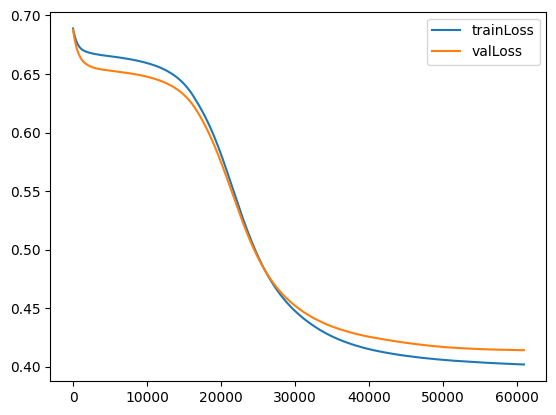

In [26]:
def trainAI(dataloader, model, loss_fn, optimizer):
    model.train()
    trainLoss=0
    for X, y in dataloader:
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        trainLoss +=loss.item()

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    return trainLoss

def valAI(dataloader, model, loss_fn):
    model.eval()
    valLoss =0
    with torch.no_grad():
        for X ,y  in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            loss = loss_fn(pred, y)
            # for i in loss:
            valLoss+= loss.item()
    return valLoss

trainLoss=[]
valLoss=[]
bestModel = model
bestLoss = float('inf')
cnt=0

while(cnt<100):
    trainLoss.append(trainAI(trainLoader, model, loss_fn, optimizer))
    valLoss.append(valAI(valLoader, model, loss_fn))

    print(f'cnt: {cnt} - valLoss: {valLoss[-1]} - trainLoss: {trainLoss[-1]}')
    if bestLoss<valLoss[-1]:
        cnt+=1
    else:
        cnt = 0
        bestLoss = valLoss[-1]
        bestModel = model

plt.plot(trainLoss,label='trainLoss')
plt.plot(valLoss,label='valLoss')
plt.legend()

In [27]:
def testAI(dataloader, model):
    model.eval()
    result = []
    y=892
    with torch.no_grad():
        for X ,_  in dataloader:
            X  = X.to(device)
            pred = model(X)
            for i in pred:
                result.append([y,torch.argmax(i).item()])
                y+=1
    return result

result = testAI(testLoader, bestModel)
result = pd.DataFrame(result)
result = result.astype(int)
result.columns=['passengerId','Survived']
result

passengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]

In [28]:
result.to_csv('result.csv',index=False)